# Iris Dataset 
The dataset belongs to the class of pattern recognition literature. It contains 3 classes of 50 instances each, where each class refers to a type of Iris Plant. <br>
The dataset can be found [**here**](https://archive.ics.uci.edu/ml/datasets/iris) with relevant background. <br>
In the notebook, the following is performed: 
- Exploratory data analysis (EDA) with visualizations on the dataset.
- Supervised / Unsupervised machine learning techniques to predict the species.

## Table of Contents
1. [Importing modules and the dataset](#1)
2. [Some Exploratory Data Analysis](#2)
3. [Data cleaning / Prepping for model training](#3)
4. [Model training](#4)
5. [Conclusion](#5)

<div id='1'></div>

<br>

### **1. Importing modules and the dataset**

In [1]:
# Set up
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# ML
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<br>
Loading the dataset.

In [2]:
iris = pd.read_csv("dataset/Iris.csv").drop('Id', axis = 1)

In [3]:
display(iris.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
display(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [5]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<div id='2'></div>

<br>

### **2. Some Exploratory Data Analysis**

#### a) Univariate Relations 

In [6]:
%matplotlib inline
sns.set_theme(style = "whitegrid")

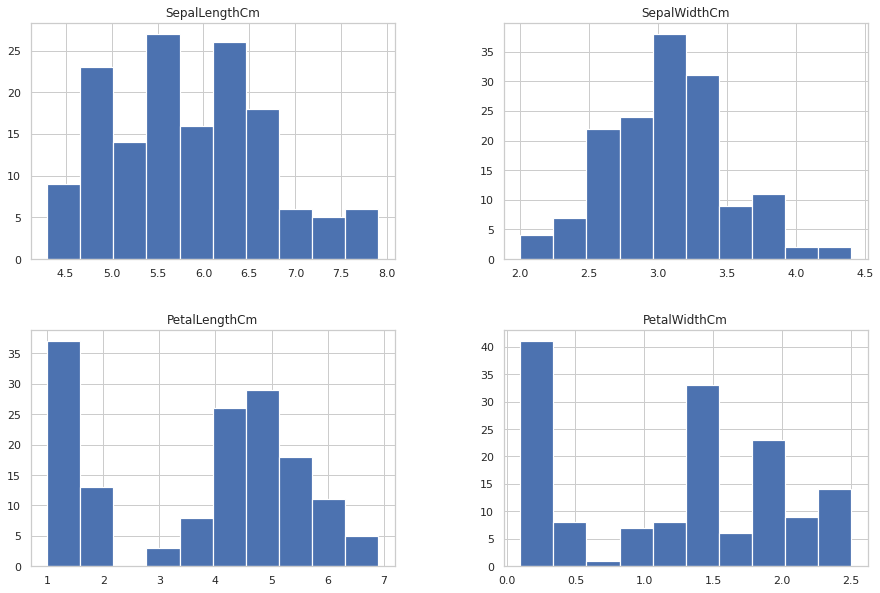

In [7]:
# Distribution of Each column
iris.hist(linewidth = 1.2, figsize = (15, 10))
plt.show()

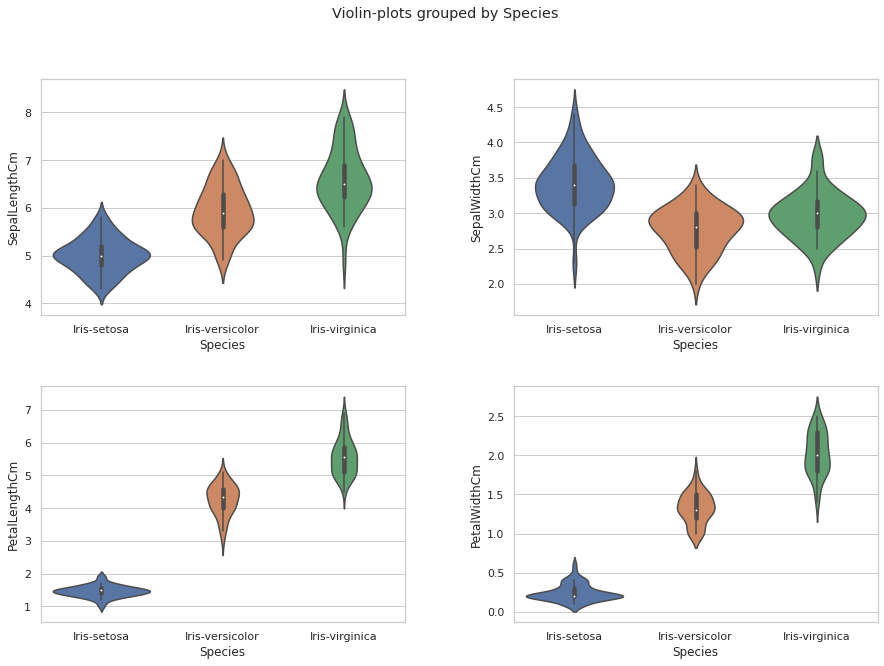

In [8]:
# Violin Plot grouped by Species
f, axes = plt.subplots(2, 2, figsize = (15, 10))
sns.violinplot(y = 'SepalLengthCm', x = 'Species', data = iris, ax = axes[0][0])
sns.violinplot(y = 'SepalWidthCm', x = "Species", data = iris, ax = axes[0][1])
sns.violinplot(y = 'PetalLengthCm', x = 'Species', data = iris, ax = axes[1][0])
sns.violinplot(y = 'PetalWidthCm', x = "Species", data = iris, ax = axes[1][1])
f.suptitle("Violin-plots grouped by Species")
f.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()

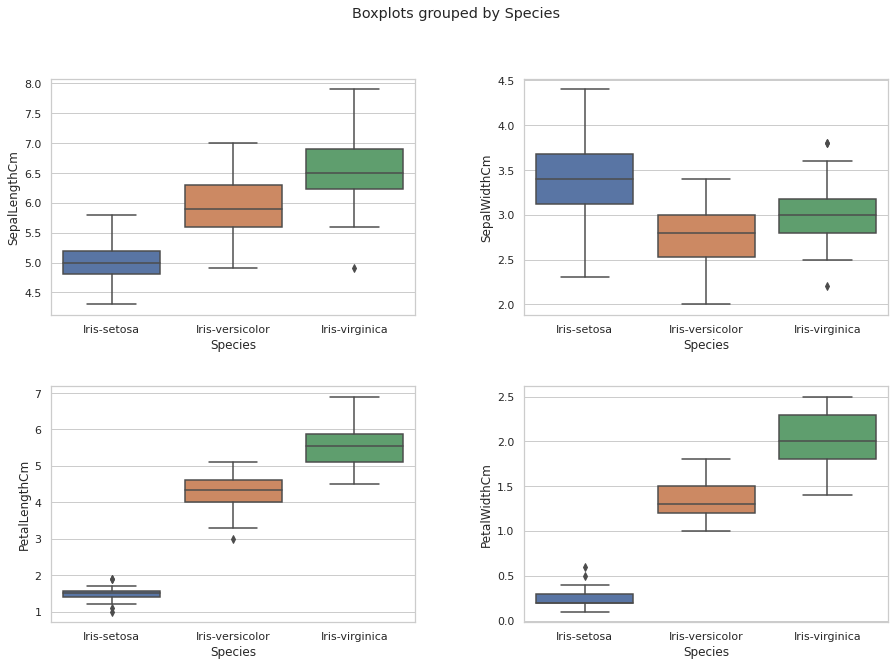

In [9]:
# Box Plot grouped by Species
f, axes = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(y = 'SepalLengthCm', x = 'Species', data = iris, ax = axes[0][0])
sns.boxplot(y = 'SepalWidthCm', x = "Species", data = iris, ax = axes[0][1])
sns.boxplot(y = 'PetalLengthCm', x = 'Species', data = iris, ax = axes[1][0])
sns.boxplot(y = 'PetalWidthCm', x = "Species", data = iris, ax = axes[1][1])
f.suptitle("Boxplots grouped by Species")
f.subplots_adjust(wspace = 0.3, hspace = 0.3)
plt.show()

#### b) Bivariate Relations

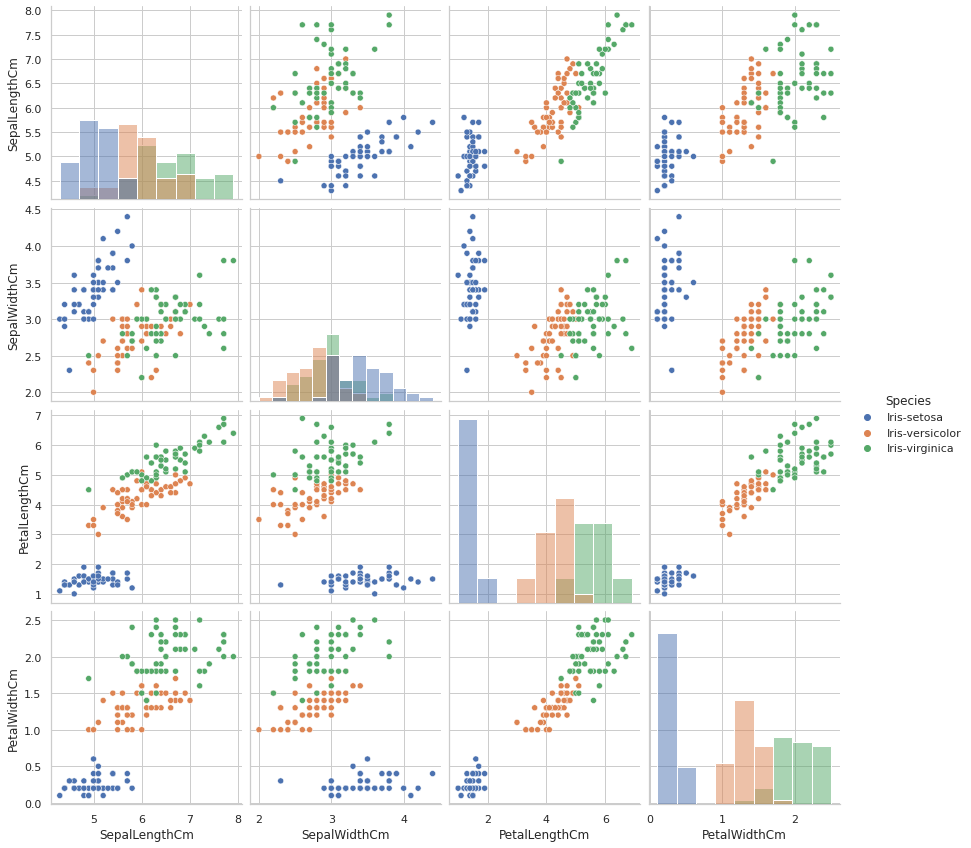

In [10]:
# Bivariate Relation between each pair of features
sns.pairplot(iris, hue = 'Species', diag_kind = 'hist', height = 3)
plt.show()

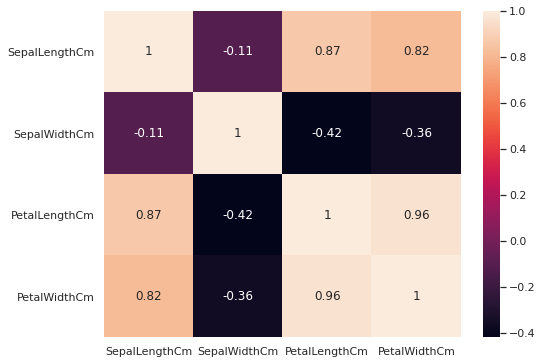

In [11]:
# Correlation Heatmap 
plt.figure(figsize = (8, 6))
sns.heatmap(iris.corr(), annot = True)
plt.show()

Clearly,
- Petal Length and Petal Width 
- Sepal Length and Petal Length 
<br>
are highly correlated.

<div id='3'></div>

<br>

### **3. Data Cleaning / Prepping for model training**

In [12]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (105, 4), (105,)
Testing set shape: (45, 4), (45,)


<div id='4'></div>

<br>

### **4. Model training**

First we'll train an Unsupervised model i.e. K-Means. <br>
We will first calculate the optimal number of clusters for K-Means, using the Elbow method.

In [14]:
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [15]:
inertia

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.598978434287126,
 30.085307692307698,
 28.063274732725528]

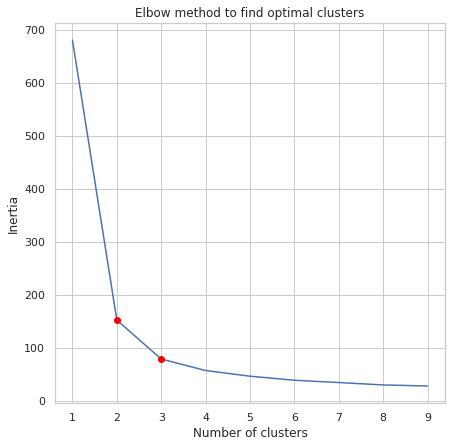

In [16]:
plt.figure(figsize = (7, 7))

plt.plot(range(1, 10), inertia)
plt.title("Elbow method to find optimal clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

# Marking the elbow point
plt.plot(2, inertia[1], marker = 'o', color= 'red')
plt.plot(3, inertia[2], marker = 'o', color= 'red')

plt.show()

Hence, the optimal number of clusters are 2 to 3. 

#### Visualizing the clusters 

In [17]:
kmeans = KMeans(3)
kmeans.fit(X)

clusters = kmeans.fit_predict(X)

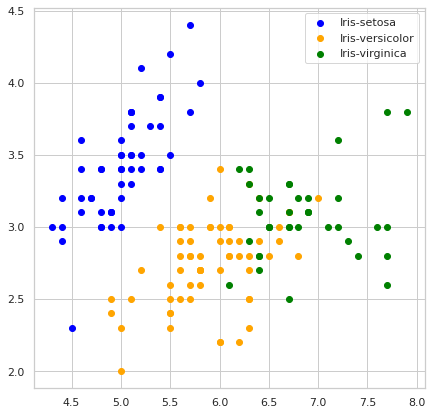

In [18]:
x = iris.iloc[:, [0, 1, 2, 3]].values
plt.figure(figsize = (7, 7))

plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1],
            c = 'blue', label = 'Iris-setosa')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1],
            c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1],
            c = 'green', label = 'Iris-virginica')

plt.legend()
plt.show()

<br>

#### **Using KNeighbors Classifier**

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_pred, y_test)
print(f'The accuracy of KNN is: {accuracy_knn}')

The accuracy of KNN is: 1.0


<br>

#### **Using Decision Tree Classifier**

In [20]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_pred, y_test)
print(f'The accuracy of Decision Tree is: {accuracy_dt}')

The accuracy of Decision Tree is: 1.0


<div id='5'></div>

### **5. Conclusion** 
Well, I'm getting accuracy score of 1.0 on my models.
<br> 